### Website Traffic Prediction

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

It works best with time series that have strong seasonal effects and several seasons of historical data. 

Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [24]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
#%matplotlib inline
#plt.style.use('ggplot')

In [25]:
df = pd.read_excel("AudienceOverview20160906-20171013.xlsx")
df.head()

,Day Index,Users
0,2016-09-06,2336
1,2016-09-07,2366
2,2016-09-08,2440
3,2016-09-09,2350
4,2016-09-10,1583


In [20]:
#check is to make sure the Day Index column came through as a datetime type:
df.dtypes

Day Index    datetime64[ns]
Users                 int64
dtype: object

In [42]:
df.set_index('Day Index').plot();

ValueError: view limit minimum -36823.282912277675 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7d33152598> (for post_execute):


ValueError: view limit minimum -36823.282912277675 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36823.282912277675 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

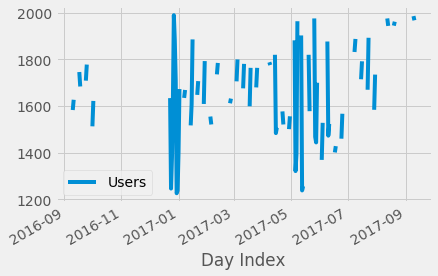

In [27]:
df.loc[(df['Users'] > 2000), 'Users'] = np.nan
df.set_index('Day Index').plot();

In [28]:
import datetime
print('Last run:', datetime.datetime.utcnow(), 'GMT')

Last run: 2019-01-02 14:30:29.455183 GMT


In [39]:
model = Prophet() #instantiate Prophet
model.fit(df); #fit the model with your dataframe

ValueError: Dataframe must have columns 'ds' and 'y' with the dates and values respectively.

In [37]:
df['y_orig'] = df['Users'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
df['Users'] = np.log(df['Users'])

In [38]:
df.head()

,Day Index,Users,y_orig
0,2016-09-06,NaN,NaN
1,2016-09-07,NaN,NaN
2,2016-09-08,NaN,NaN
3,2016-09-09,NaN,NaN
4,2016-09-10,7.367077,1583.0
